This script tests the metabolites by Spearman correlation across the common samples (128 samples) WITHOUT converting to pathway scores (PA = pathway analysis). I still kept the pathway score data anyway in case you want to compare. Since we are not looking at pathways, I don't calculate the overlap coefficient.

In [1]:
#Load libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import sspa
from sklearn.preprocessing import StandardScaler
import scipy 
import networkx as nx


In [ ]:
#Load the whole dataset
#df = pd.read_csv('Data/Su_COVID_metabolomics_processed.csv', index_col=0)
#df.index= df.index.str.rstrip('-BL')
#print(df.iloc[:10,-2:])    #show subset of control data (first 10 rows, last two columns)

In [2]:
#Load the common cases dataset
df = pd.read_csv('Data/Su_COVID_metabolomics_processed_commoncases.csv', index_col=0)

In [ ]:
df_mild = (df[df["WHO_status"] == '1-2']) #45 samples, no need to remove the metadata, since I do that in a later step
df_severe = (df[(df["WHO_status"] == '3-4') | (df["WHO_status"] == '5-7')]) #83 samples

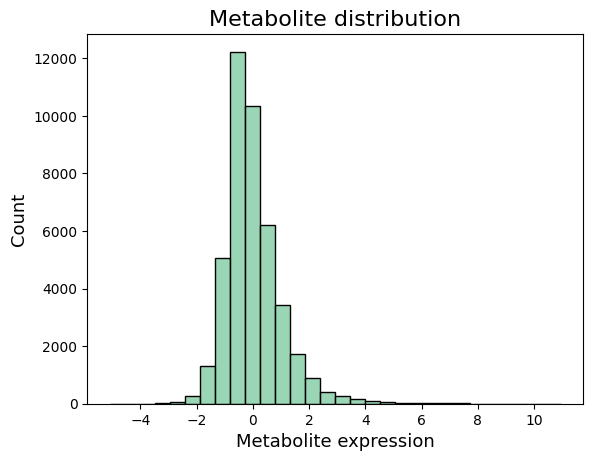

In [9]:
df_num  = df.iloc[:,:-2] #all rows, all columns apart from last two
df_num = df_num.to_numpy()

df_hist = df_num.flatten()
sns.histplot(df_hist, bins = 30,color='#79C99E',edgecolor="k") 

plt.title('Metabolite distribution',fontsize=16)
plt.xlabel('Metabolite expression',fontsize=13)
plt.ylabel('Count',fontsize=13) ;

#plt.savefig( 'Figures/metabolite_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

### Single sample pathway analysis

In [4]:
#Trying to download latest version of Reactome (version 84)
#reactome_pathways = sspa.process_reactome("Homo sapiens", download_latest=True, filepath=".")
reactome_pathways = sspa.process_gmt("Data/Reactome_Homo_sapiens_pathways_compounds_R84.gmt")
#View name of pathway IDs
reactome_pathways

kpca_scores = sspa.sspa_kpca(df.iloc[:,:-2], reactome_pathways)

In [5]:
#Remove root pathways
#Convert pathway ID to name
root_path = pd.read_excel('Data/Root_pathways.xlsx', header=None)
root_pathway_dict = {root_path[0][i]:root_path[1][i] for i in range(0,len(root_path))}

root_pathway_names = list(root_pathway_dict.keys())
#Using Sara's code
kpca_scores = kpca_scores.drop(columns = list(set(root_pathway_names) & set(kpca_scores.columns)))

In [6]:
kpca_scores

,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-1237112,R-HSA-1368082,R-HSA-1368108,R-HSA-1428517,R-HSA-1483148,R-HSA-1483206,...,R-HSA-9707564,R-HSA-9707616,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-9734207,R-HSA-9735804,R-HSA-9749641,R-HSA-9753281,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
INCOV001,-0.376183,0.023789,0.470185,-0.028633,-0.230591,-0.156796,-0.156796,-0.164922,0.298052,-0.371426,...,-0.156796,-0.156796,-0.156796,0.251727,-0.374152,-0.417449,0.039264,-0.463495,-0.320570,-0.156796
INCOV002,-0.311560,-0.092256,0.371911,-0.193472,0.380581,0.523125,0.523125,-0.298485,-0.592081,0.238697,...,0.523125,0.523125,0.523125,0.293598,-0.321341,-0.078743,0.004789,0.690230,-0.284524,0.523125
INCOV003,-0.308065,0.016257,0.605379,0.002243,0.196997,0.294189,0.294189,-0.180590,0.036414,-0.202217,...,0.294189,0.294189,0.294189,0.299947,0.319285,0.516905,-0.274521,0.527403,-0.469985,0.294189
INCOV004,0.664277,0.165562,-0.112130,-0.001627,0.063758,0.289325,0.289325,-0.332864,-0.232279,-0.250680,...,0.289325,0.289325,0.289325,0.425024,-0.465348,-0.394084,0.679731,-0.170759,-0.120595,0.289325
INCOV005,0.265643,0.400127,-0.427878,0.285042,0.133373,0.652853,0.652853,0.136137,-0.156159,-0.182578,...,0.652853,0.652853,0.652853,-0.108267,0.220742,-0.187237,0.374706,0.261147,-0.244730,0.652853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135,-0.394520,0.259495,0.025824,0.226963,-0.180511,0.444582,0.444582,0.324441,-0.566872,0.132579,...,0.444582,0.444582,0.444582,-0.511849,0.513085,-0.316599,-0.115509,-0.053170,-0.549767,0.444582
INCOV136,-0.206822,0.033658,0.125002,0.085359,0.674275,-0.663270,-0.663270,0.535411,0.598635,0.125325,...,-0.663270,-0.663270,-0.663270,-0.436924,0.379013,0.524433,-0.306521,-0.285025,-0.554492,-0.663270
INCOV137,-0.342753,0.160082,0.205079,0.211039,0.134428,0.417418,0.417418,-0.580234,-0.375882,0.301830,...,0.417418,0.417418,0.417418,0.294597,-0.321731,0.106948,-0.337870,-0.057217,-0.485134,0.417418


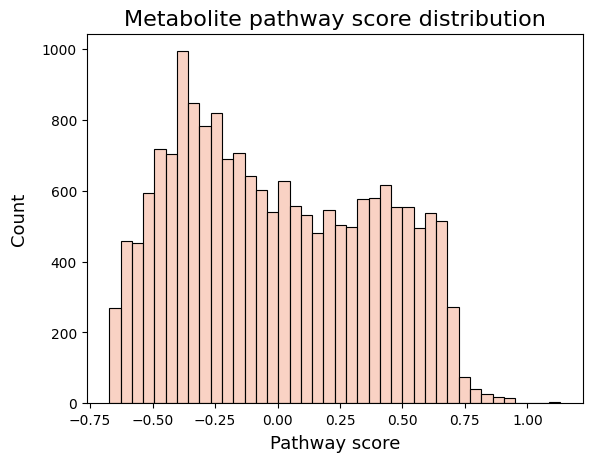

In [7]:

kpca_hist = kpca_scores.to_numpy()
kpca_hist = kpca_hist.flatten()
sns.histplot(kpca_hist, bins = 40,color='#F7C3B1',edgecolor="k") 

plt.title('Metabolite pathway score distribution',fontsize=16)
plt.xlabel('Pathway score',fontsize=13, labelpad=5)
plt.ylabel('Count',fontsize=13, labelpad=10) ;

#plt.savefig( 'Figures/metabolite_pathway_distribution.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

### Spearman correlation coefficient

In [6]:
kpca_scores

,R-HSA-110331,R-HSA-112310,R-HSA-112311,R-HSA-112315,R-HSA-1237112,R-HSA-1368082,R-HSA-1368108,R-HSA-1428517,R-HSA-1483148,R-HSA-1483206,...,R-HSA-9707564,R-HSA-9707616,R-HSA-9711123,R-HSA-9717189,R-HSA-9717207,R-HSA-9734207,R-HSA-9735804,R-HSA-9749641,R-HSA-9753281,R-HSA-975634
sample_id,,,,,,,,,,,,,,,,,,,,,
INCOV001,-0.376183,0.023789,0.470185,-0.028633,-0.230591,-0.156796,-0.156796,-0.164922,0.298052,-0.371426,...,-0.156796,-0.156796,-0.156796,0.251727,-0.374152,-0.417449,0.039264,-0.463495,-0.320570,-0.156796
INCOV002,-0.311560,-0.092256,0.371911,-0.193472,0.380581,0.523125,0.523125,-0.298485,-0.592081,0.238697,...,0.523125,0.523125,0.523125,0.293598,-0.321341,-0.078743,0.004789,0.690230,-0.284524,0.523125
INCOV003,-0.308065,0.016257,0.605379,0.002243,0.196997,0.294189,0.294189,-0.180590,0.036414,-0.202217,...,0.294189,0.294189,0.294189,0.299947,0.319285,0.516905,-0.274521,0.527403,-0.469985,0.294189
INCOV004,0.664277,0.165562,-0.112130,-0.001627,0.063758,0.289325,0.289325,-0.332864,-0.232279,-0.250680,...,0.289325,0.289325,0.289325,0.425024,-0.465348,-0.394084,0.679731,-0.170759,-0.120595,0.289325
INCOV005,0.265643,0.400127,-0.427878,0.285042,0.133373,0.652853,0.652853,0.136137,-0.156159,-0.182578,...,0.652853,0.652853,0.652853,-0.108267,0.220742,-0.187237,0.374706,0.261147,-0.244730,0.652853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135,-0.394520,0.259495,0.025824,0.226963,-0.180511,0.444582,0.444582,0.324441,-0.566872,0.132579,...,0.444582,0.444582,0.444582,-0.511849,0.513085,-0.316599,-0.115509,-0.053170,-0.549767,0.444582
INCOV136,-0.206822,0.033658,0.125002,0.085359,0.674275,-0.663270,-0.663270,0.535411,0.598635,0.125325,...,-0.663270,-0.663270,-0.663270,-0.436924,0.379013,0.524433,-0.306521,-0.285025,-0.554492,-0.663270
INCOV137,-0.342753,0.160082,0.205079,0.211039,0.134428,0.417418,0.417418,-0.580234,-0.375882,0.301830,...,0.417418,0.417418,0.417418,0.294597,-0.321731,0.106948,-0.337870,-0.057217,-0.485134,0.417418


In [16]:
df_num = df.iloc[:,:-2]
df_num

,1372,16610,72665,27823,30915,37373,16831,545959,17050,16359,...,64032,133677,133693,133694,28036,28238,76341,89312,17861,89188
sample_id,,,,,,,,,,,,,,,,,,,,,
INCOV001,-0.342522,-0.830841,-0.703451,-0.451278,0.153207,-0.443252,-0.228725,0.501998,-0.861886,-0.344155,...,-0.638481,-0.442435,-0.465505,0.055753,-0.225622,0.400398,0.163210,1.579262,-0.162221,-0.603790
INCOV002,-0.125585,-1.002246,0.399273,-0.828341,-0.980576,0.373921,-1.076979,-0.131876,-0.869093,-0.467326,...,0.184722,0.754529,0.509336,0.627269,0.321718,-0.158514,0.001469,-1.051485,1.299330,0.578560
INCOV003,-0.859326,-0.409159,3.573100,-0.546783,-0.993647,1.547649,0.370131,-0.020399,-0.703786,-0.015627,...,0.340992,0.821427,2.056610,1.717149,-0.297723,-1.276891,-0.658288,2.141594,-1.091183,0.447197
INCOV004,-0.562999,-1.560249,-1.269383,-1.437919,0.108734,-0.192066,0.161591,-0.586759,-1.457246,-0.500612,...,-0.813709,0.654603,0.793065,-0.033125,-0.366082,-0.642671,1.724436,2.074193,-1.021184,-0.410849
INCOV005,-0.741957,0.387909,-0.711036,-0.711515,0.670720,0.610591,-0.322241,-0.793451,-1.230681,-0.246493,...,-0.706947,-0.622473,-0.184967,-0.469553,-0.293869,0.558366,-0.390308,-0.455737,-0.535223,-0.847727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INCOV135,-2.075777,-0.485936,-0.671225,0.069483,0.042579,0.357250,-0.505272,-0.378441,-0.444915,-0.368108,...,-0.850092,-0.469804,-0.516557,-0.392716,-0.328170,1.013774,-0.391566,-0.407585,1.041224,-0.866190
INCOV136,-0.174602,1.167644,0.055499,0.113342,-0.663851,0.799367,0.004697,0.748894,1.328753,0.391221,...,-0.006490,-0.616804,-0.741578,-0.730981,-0.380517,-1.251641,0.389163,-0.603048,0.941619,-0.511694
INCOV137,0.274900,-0.014841,-0.928512,0.885263,-1.591862,0.230250,0.057818,-0.775962,-0.179700,-0.534786,...,-0.814261,-1.518841,-1.306132,-1.246428,1.763824,1.258387,0.448359,-0.508931,0.268474,-0.997206


In [19]:

#"If axis=0 (default), then each column represents a variable, with observations in the rows"
spearman_results = scipy.stats.spearmanr(df_num)

spearman_coef = spearman_results[0] #correlation coefficients
spearman_pvals = spearman_results[1] #p-values


#Using Sara's code (rather than having separate dataframes for each analysis, add all together in long format)
squared_spearman_coef_df = pd.DataFrame(spearman_coef,columns = df_num.columns, index=df_num.columns)
squared_spearman_coef_list = squared_spearman_coef_df.stack().reset_index()
squared_spearman_coef_list.columns = ["Metabolite1", "Metabolite2", "Spearman_corr"]
squared_spearman_coef_list["Squared_corr"]  = np.square(squared_spearman_coef_list.Spearman_corr)

spearman_pvals_df = pd.DataFrame(spearman_pvals,columns = df_num.columns, index=df_num.columns)
spearman_pvals_list = spearman_pvals_df.stack().reset_index()
spearman_pvals_list.columns = ["Metabolite1", "Metabolite2", "pval"]

#Multiple testing correction for the p-values to prepare the corrected p-values for the final correlation network
#Multiplies by the correct number of tests (i.e. not including the duplicates or self-comparisons)
#Does not remove the diagonals or the duplicates themselves

num_of_tests = (len(df_num.columns)**2 - len(df_num.columns))/2
print(num_of_tests)
corrected_spearman_pvals = spearman_pvals_list.pval*num_of_tests
#If the p-val goes beyond 1 (max number for a p-value, change to 1)
corrected_spearman_pvals = np.where(corrected_spearman_pvals < 1, corrected_spearman_pvals, 1)
spearman_pvals_list["pval_adj"]  = corrected_spearman_pvals

spearman_df = squared_spearman_coef_list.merge(spearman_pvals_list,on=["Metabolite1", "Metabolite2"])

display(spearman_df)

55278.0


,Metabolite1,Metabolite2,Spearman_corr,Squared_corr,pval,pval_adj
0,1372,1372,1.000000,1.000000,0.000000,0.0
1,1372,16610,0.065338,0.004269,0.463711,1.0
2,1372,72665,0.313095,0.098029,0.000320,1.0
3,1372,27823,0.326257,0.106443,0.000171,1.0
4,1372,30915,-0.189320,0.035842,0.032331,1.0
...,...,...,...,...,...,...
110884,89188,28238,-0.158196,0.025026,0.074510,1.0
110885,89188,76341,-0.315407,0.099482,0.000287,1.0
110886,89188,89312,-0.008057,0.000065,0.928078,1.0
110887,89188,17861,-0.344992,0.119019,0.000067,1.0


Bonferroni: https://avast.github.io/ep-stats/stats/multiple.html

Method 1: The alpha value (0.05) is divided by the number of tests (e.g. 225 pathways x 225 pathways = 50,625) and then the original p-vals are compared to the adjusted alpha value

Method 2: The alpha value remains unchanged and the individual p-values are adjusted (i.e. original p-value x number of tests) to increase them, and then compared to see if they cross the 0.05 significance level

After adjustment, some corrected p-values go up to 1 (the maximum)

In [20]:
#Perform multiple testing correlation on p-values after the duplicates are removed

#All self-comparisons are significant with a p-value of 0, so we can subtract those from the number of significant values before we divide by 2
sig_vals = (sum(i < 0.005 for i in spearman_df.pval_adj)-len(kpca_scores.columns))   /2
non_sig_vals = sum(i >= 0.005 for i in spearman_df.pval_adj)/2

print("Number of significant values:", sig_vals)
print("Number of non-significant values:", non_sig_vals)
(sig_vals/(sig_vals+non_sig_vals)) * 100

Number of significant values: 2423.5
Number of non-significant values: 52949.0


4.376721296672536

In [22]:
#This function takes in dataframe, and masks one half and the diagonal to remove duplicates to prepare for a histogram plot
def duplicate_removal(df):
    #Mask the upper half of the dataframe (so I don't view the comparisons between the two same genes, and also the duplicate comparisons are removed)
    mask =  df.copy()
    mask = np.triu(np.ones(mask.shape)).astype(bool)
    mask = np.invert(mask) #invert true and false values so the diagonal is False as well
    non_dup_df = pd.DataFrame(df)
    non_dup_df = non_dup_df.where(mask) #Replace all false values with NaN using mask

    spearman_hist = non_dup_df.to_numpy().flatten()
    spearman_hist = spearman_hist[~np.isnan(spearman_hist)] #remove nan values

    return spearman_hist

55278


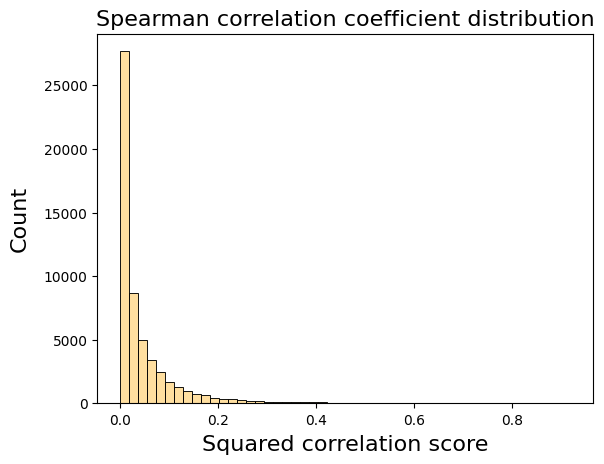

In [39]:
squared_spearman_coef = np.square(spearman_coef)
#abs_spearman_coef = np.abs(spearman_coef)
spearman_hist = duplicate_removal(squared_spearman_coef)  

print(len(spearman_hist))
sns.histplot(spearman_hist, bins = 50,color='#FFD580',edgecolor="k") 

plt.title('Spearman correlation coefficient distribution',fontsize=16)
plt.xlabel('Squared correlation score',fontsize=16, labelpad=5)
plt.ylabel('Count',fontsize=16, labelpad=10) ;

#plt.savefig('Figures/metabolite_spearman_correlation_distribution_squared_non_dup.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

c:\Users\jenna\anaconda3\envs\Imperial_Project2\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


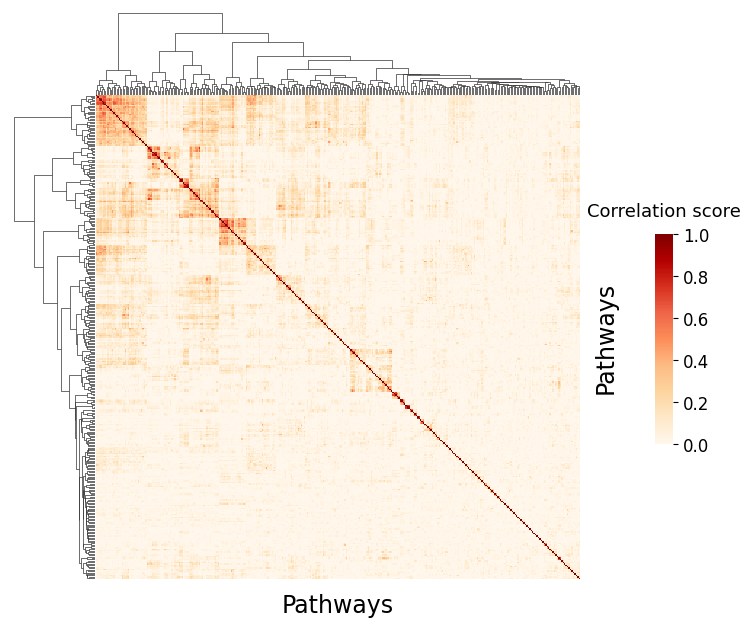

In [24]:

#The reason for plotting as absolute or squared is that kPCA does not determine the directionality of effect
#Therefore the direction specified here is arbitrary i.e. negative pathway score does not mean downregulation of pathway


g = sns.clustermap(
    squared_spearman_coef,
    metric='euclidean', 
    method ="ward",
    cmap="OrRd",    #Spectral_r for normal,  OrRd for the other two
    xticklabels=False,
    yticklabels=False,
    figsize=(6,6),
    dendrogram_ratio=0.15, 
    vmin=0, 
    vmax=1) 

g2 = g.ax_heatmap
g2.set_xlabel("Pathways", fontsize = 17, labelpad=10) #labelpad increases the distance between the axis label and the heatmap
g2.set_ylabel("Pathways", fontsize = 17, labelpad=10) 

x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([1.1, 0.25, 0.03, 0.35])
g.cax.set_title("Correlation score",pad=13,size=13) #pad: increase spacing slightly  
g.cax.tick_params(labelsize=12) #change font size of colourbar labels; 

#plt.savefig( 'Figures/squared_metabolite_spearman.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

55278


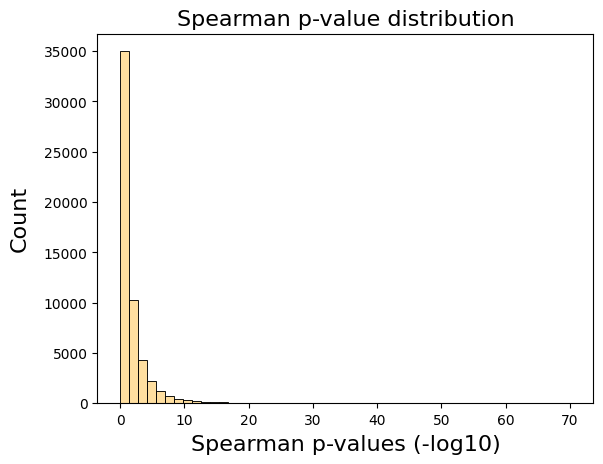

In [25]:
#Plotting the Spearman p-values
np.seterr(divide = 'ignore')    
log_spearman_pvals = -np.log10(spearman_pvals)
np.seterr(divide = 'warn') 

spearman_pval_hist = duplicate_removal(log_spearman_pvals)  #Some inf values that are not plotted (too far along axis)
print(len(spearman_pval_hist))
sns.histplot(spearman_pval_hist, bins = 50,color='#FFD580',edgecolor="k") 

plt.title('Spearman p-value distribution',fontsize=16)
plt.xlabel('Spearman p-values (-log10)',fontsize=16, labelpad=5)
plt.ylabel('Count',fontsize=16, labelpad=10) ;

#plt.savefig('Figures/metabolite_spearman_pval_distribution_non_dup.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

### Constructing overlap coefficient network graphs

In [ ]:
#Practice code
#Even for an edge going between two pathways, it's a single line here and in Cytoscape as well
#If you wanted to draw multiple edges going between the same two nodes, you would need to draw a multigraph
G = nx.Graph()

practice_df = {'Pathway1': ['A', 'B', 'C', 'D','D'], 'Pathway2': ['B','A','D','C','D'], 'weight': [1,1,2,5,3]}
pd.DataFrame(data=practice_df, index=[0, 1, 2, 3,4])

G = nx.from_pandas_edgelist(df=practice_df, source='Pathway1', target='Pathway2', edge_attr='weight')

nx.draw(G, with_labels = True)

#nx.write_gml(G, "test.gml")

In [29]:
#Remove self-correlations
spearman_df = spearman_df [spearman_df.Metabolite1 != spearman_df.Metabolite2]
spearman_df = spearman_df.reset_index(drop=True)
spearman_df

,Metabolite1,Metabolite2,Spearman_corr,Squared_corr,pval,pval_adj
0,1372,16610,0.065338,0.004269,0.463711,1.0
1,1372,72665,0.313095,0.098029,0.000320,1.0
2,1372,27823,0.326257,0.106443,0.000171,1.0
3,1372,30915,-0.189320,0.035842,0.032331,1.0
4,1372,37373,-0.263991,0.069691,0.002604,1.0
...,...,...,...,...,...,...
110551,89188,28036,-0.184484,0.034034,0.037101,1.0
110552,89188,28238,-0.158196,0.025026,0.074510,1.0
110553,89188,76341,-0.315407,0.099482,0.000287,1.0
110554,89188,89312,-0.008057,0.000065,0.928078,1.0


### Final correlation network

Remember to take the corrected Spearman p-values

In [30]:
spearman_df

,Metabolite1,Metabolite2,Spearman_corr,Squared_corr,pval,pval_adj
0,1372,16610,0.065338,0.004269,0.463711,1.0
1,1372,72665,0.313095,0.098029,0.000320,1.0
2,1372,27823,0.326257,0.106443,0.000171,1.0
3,1372,30915,-0.189320,0.035842,0.032331,1.0
4,1372,37373,-0.263991,0.069691,0.002604,1.0
...,...,...,...,...,...,...
110551,89188,28036,-0.184484,0.034034,0.037101,1.0
110552,89188,28238,-0.158196,0.025026,0.074510,1.0
110553,89188,76341,-0.315407,0.099482,0.000287,1.0
110554,89188,89312,-0.008057,0.000065,0.928078,1.0


In [46]:
spearman_df.sort_values(by='Squared_corr',ascending=False)

,Metabolite1,Metabolite2,Spearman_corr,Squared_corr,pval,pval_adj
108224,133693,133677,0.959033,9.197450e-01,7.087653e-71,3.917913e-66
107892,133677,133693,0.959033,9.197450e-01,7.087653e-71,3.917913e-66
58254,48430,35932,0.953162,9.085182e-01,2.725713e-67,1.506720e-62
51302,35932,48430,0.953162,9.085182e-01,2.725713e-67,1.506720e-62
65625,83037,83040,0.931263,8.672500e-01,4.290189e-57,2.371530e-52
...,...,...,...,...,...,...
91785,4828,18089,0.000011,1.309832e-10,9.998977e-01,1.000000e+00
81824,27905,30745,0.000011,1.309832e-10,9.998977e-01,1.000000e+00
50709,30745,27905,0.000011,1.309832e-10,9.998977e-01,1.000000e+00
51071,18089,4828,0.000011,1.309832e-10,9.998977e-01,1.000000e+00


In [31]:
#Create EDGE ATTRIBUTES table to filter out unneeded edges

final_df = spearman_df[spearman_df["pval_adj"] < 0.005]  
final_df = final_df.reset_index(drop=True) 
display(final_df) #the duplicate edges have not been removed yet

,Metabolite1,Metabolite2,Spearman_corr,Squared_corr,pval,pval_adj
0,1372,16467,0.468286,0.219292,2.487767e-08,1.375188e-03
1,1372,17066,-0.562403,0.316297,4.902892e-12,2.710221e-07
2,1372,28716,-0.574254,0.329767,1.371993e-12,7.584105e-08
3,1372,17203,0.550552,0.303107,1.667523e-11,9.217735e-07
4,1372,28875,-0.527754,0.278524,1.541899e-10,8.523308e-06
...,...,...,...,...,...,...
4653,89188,16390,-0.469008,0.219968,2.352280e-08,1.300293e-03
4654,89188,45826,-0.513253,0.263429,5.835370e-10,3.225676e-05
4655,89188,52330,0.480235,0.230626,9.670477e-09,5.345646e-04
4656,89188,45441,-0.499491,0.249491,1.950356e-09,1.078118e-04


Plot spearman correlation histogram to show edges AFTER filtering

In [34]:
#Remove duplicates in the edge list

final_df_copy = final_df.copy()

#Remove duplicate pathways
for i in range(0,len(final_df)):
    val1 = final_df.Metabolite1[i]
    val2 = final_df.Metabolite2[i]
    #print(val1,val2)
    #print(max(val1,val2))
    final_df_copy.Metabolite1[i] = min(val1,val2)
    final_df_copy.Metabolite2[i] = max(val1,val2)

final_df_copy = final_df_copy.sort_values(['Metabolite1','Metabolite2'], ascending=True)
final_df_copy = final_df_copy[::2]

C:\Users\jenna\AppData\Local\Temp\ipykernel_15448\1110282245.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_copy.Metabolite1[i] = min(val1,val2)
C:\Users\jenna\AppData\Local\Temp\ipykernel_15448\1110282245.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_copy.Metabolite2[i] = max(val1,val2)


2329


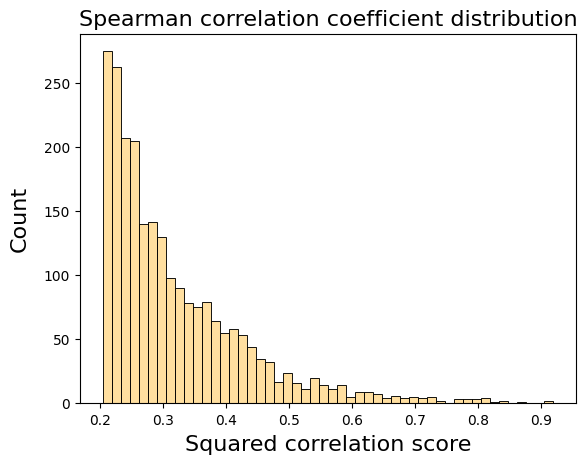

In [38]:
print(len(final_df_copy))
spearman_hist = list(final_df_copy.Squared_corr)
sns.histplot(spearman_hist, bins = 50,color='#FFD580',edgecolor="k") 

plt.title('Spearman correlation coefficient distribution',fontsize=16)
plt.xlabel('Squared correlation score',fontsize=16, labelpad=5)
plt.ylabel('Count',fontsize=16, labelpad=10) ;

#plt.savefig('Figures/metabolite_spearman_correlation_distribution_squared_afterfiltering_commoncases.png' , dpi=200,bbox_inches = 'tight' , pad_inches = 0.2 , facecolor='w')

In [49]:
nodes_with_edges = set(final_df.Metabolite1)
isolated_nodes = set(spearman_df.Metabolite1) - set(nodes_with_edges) 
isolated_nodes
len(nodes_with_edges)

283

283
2329


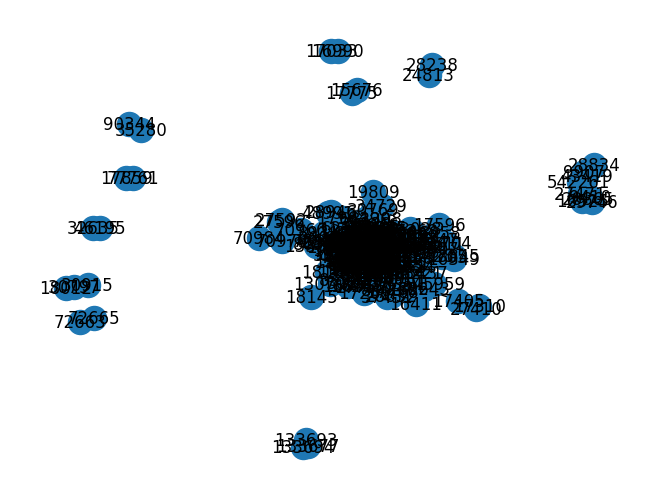

In [50]:
#Draw network graph with new edges
G = nx.Graph()
G = nx.from_pandas_edgelist(df=final_df, source='Metabolite1', target='Metabolite2', edge_attr='Squared_corr')
#G.add_nodes_from(isolated_nodes)
nx.draw(G, with_labels = True)
print(G.number_of_nodes())
print(G.number_of_edges())

In [52]:

#Add edge attributes
spearman_pval_dict = {}

for i in range(0,len(final_df)):
    spearman_pval_dict[(final_df.Metabolite1[i],final_df.Metabolite2[i])] = final_df.pval_adj[i]
  
    
nx.set_edge_attributes(G, spearman_pval_dict, "Spearman_pval")




### Setting node attributes

The betweenness centrality scores are the same whether or not the duplicates have been removed since the duplicate edges form the same edge when a graph is created

In [53]:
#IF YOU DON'T REMOVE THE EDGES, DON'T RUN THIS CODE

#Add the betweenness centrality as a node attribute
betweenness= nx.betweenness_centrality(G, normalized=True) #output as dictionary
#display(betweenness)
nx.set_node_attributes(G, betweenness, "betweenness")

#Add the betweenness centrality as a node attribute
degree= nx.degree_centrality(G) #output as dictionary
#display(degree)
nx.set_node_attributes(G, degree, "degrees")


#Check
print(G.number_of_nodes()) 
#G.nodes['R-HSA-110331']#["betweenness"]

283


In [54]:
#for some reason, not sure if really clustering by weight since it works with a typo 
#i think it works though, since changing the name gives a diff num of clusters even with seed set
#Resolution = 1 is the default, increasing resolution will yield more communities
louvain_clusters = nx.community.louvain_communities(G, weight='Squared_corr',seed=100,resolution=1.2)
print(len(louvain_clusters))

louvain_dict = {}
for index,grouping in enumerate(louvain_clusters):
    for pathway in grouping:
        louvain_dict[pathway] = index+1

nx.set_node_attributes(G, louvain_dict, "louvain")
    

19


In [55]:
print(G.number_of_nodes())
print(G.number_of_edges())

print(G.nodes['R-HSA-110331'])#["betweenness"]
print(G.edges["R-HSA-110331", "R-HSA-112310"])#["Spearman_pval"]

283
2329


KeyError: 'R-HSA-110331'

In [58]:
#nx.write_gml(G,'Cytoscape/metabolomic_withoutPA_commoncases.gml')